## <center><b>Recognizing Handwritten Digits</b></center>
<hr>
<center><b><u>Handwriting Recognition</u></b></center>

1. Load images data
2. Display first sample digit from dataset as image and pixel values
3. Diaplay Multiple digits from dataset along with labels
4. Take randomly data for train and test
5. Define Support Vector Classifier Model with linear kernel
6. Define Kernel type RBF Model
7. Define Kernel type Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm

## Load images data

In [2]:
# from sklearn.datasets import load_digits
digits_data = load_digits()

## <u>Display first sample digit from dataset as image</u>

<Figure size 432x288 with 0 Axes>

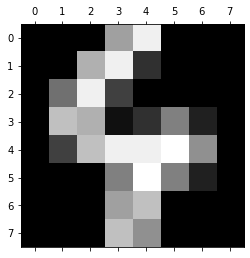

In [3]:
#import pylab as pl
pl.gray()
pl.matshow(digits_data.images[110])
pl.show()

*This dataset consists of 1,797 images that are 8x8 pixels in size. This image is a sample for example.*

### See to the pixel values of above sample digit

In [4]:
digits_data.images[14]

array([[ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 14., 13.,  1.,  1.,  0.],
       [ 0.,  0., 10., 15.,  3., 15., 11.,  0.],
       [ 0.,  7., 16.,  7.,  1., 16.,  8.,  0.],
       [ 0.,  9., 16., 13., 14., 16.,  5.,  0.],
       [ 0.,  1., 10., 15., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0., 10., 15.,  4.,  0.,  0.]])

## <u>Diaplay Multiple digits from dataset along with labels</u>

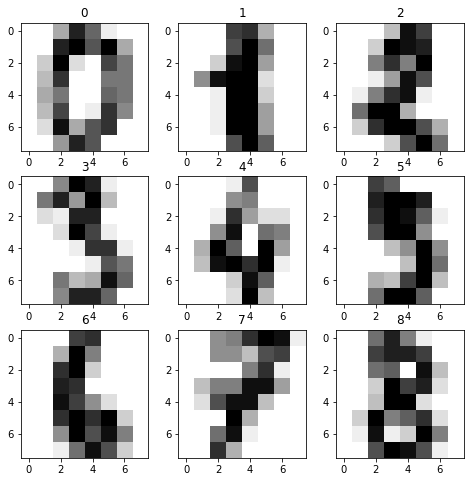

In [5]:
images_and_labels = list(zip(digits_data.images, digits_data.target))
plt.figure(figsize=(8,8))
for index, (image, label) in enumerate(images_and_labels[:9]):
    plt.subplot(3, 3, index + 1)
#     plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [6]:
len(digits_data.images)

1797

## Take randomly data for train and test

In [7]:
x, y = digits_data['data'], digits_data['target']
x.shape, y.shape

((1797, 64), (1797,))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.shape, x_test.shape

((1347, 64), (450, 64))

## <u>Define Support Vector Classifier Model with linear kernel</u>

In [9]:
model_linear = svm.SVC(kernel='linear', degree=3, gamma='scale')
model_svc = model_linear.fit(x_train, y_train)

**<u style="color:blue;">Predict</u>**

In [10]:
model_svc.predict(x_test)

array([2, 7, 9, 5, 8, 7, 8, 9, 7, 3, 6, 7, 7, 7, 5, 4, 1, 6, 1, 1, 4, 9,
       9, 6, 9, 9, 0, 9, 7, 0, 6, 2, 0, 8, 8, 0, 2, 9, 3, 7, 0, 3, 9, 2,
       1, 7, 4, 1, 9, 3, 1, 3, 6, 0, 5, 7, 4, 0, 1, 6, 7, 7, 6, 2, 3, 1,
       2, 0, 6, 1, 4, 8, 3, 7, 0, 5, 2, 6, 4, 3, 3, 8, 6, 2, 8, 1, 8, 7,
       3, 3, 2, 5, 7, 4, 4, 7, 8, 3, 5, 2, 5, 9, 3, 7, 3, 1, 1, 4, 9, 0,
       3, 3, 4, 1, 2, 6, 4, 8, 7, 7, 1, 2, 5, 3, 5, 2, 1, 5, 6, 9, 8, 1,
       6, 0, 8, 6, 6, 2, 0, 5, 0, 0, 2, 5, 0, 2, 2, 0, 4, 8, 0, 5, 1, 0,
       4, 7, 1, 2, 4, 9, 3, 6, 4, 0, 6, 7, 0, 0, 1, 0, 5, 9, 2, 3, 6, 7,
       7, 0, 3, 2, 3, 6, 8, 4, 3, 1, 5, 7, 5, 7, 1, 9, 9, 1, 1, 5, 9, 0,
       8, 4, 7, 8, 4, 9, 3, 4, 8, 2, 5, 8, 7, 8, 7, 5, 7, 1, 2, 7, 1, 7,
       0, 5, 9, 1, 5, 8, 1, 6, 1, 2, 9, 3, 0, 2, 5, 8, 5, 7, 7, 2, 8, 4,
       5, 5, 7, 9, 8, 9, 6, 1, 9, 9, 8, 0, 6, 0, 7, 7, 6, 9, 4, 0, 2, 5,
       2, 8, 0, 0, 2, 2, 4, 2, 6, 4, 6, 6, 2, 4, 6, 9, 5, 6, 7, 6, 8, 7,
       9, 0, 2, 8, 4, 4, 1, 8, 5, 8, 6, 1, 1, 4, 7,

**<u style="color:blue;">Evaluate the model using accuracy</u>**

In [11]:
model_svc.score(x_test, y_test)

0.9688888888888889

**<u style="color:blue;">Check for prediction from dataset of Support Vector Classifier Model</u>**

In [12]:
from sklearn.metrics import classification_report
predictions = model_svc.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.90      0.95      0.92        38
           2       0.97      0.97      0.97        40
           3       0.98      0.97      0.97        58
           4       1.00      1.00      1.00        48
           5       0.98      0.98      0.98        49
           6       1.00      1.00      1.00        41
           7       1.00      0.98      0.99        47
           8       0.87      0.89      0.88        44
           9       0.98      0.95      0.96        42

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



*We got an accuracy score of around 99% on the images dataset. Use Support Vector Classifier Model with linear kernel for Recognizing Handwritten Digits.*